In [1]:
import pandas as pd

dataset = pd.read_csv('spotify_songs.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   artistas                  32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [2]:
colunas_irrelevantes = ['track_id', 'track_album_id', 
'track_album_release_date', 'playlist_name', 'playlist_id',
'duration_ms']
dataset = dataset.drop(columns=colunas_irrelevantes)

In [3]:
musicas_duplicadas = dataset[dataset.duplicated]
dataset_sem_duplicatas = dataset.drop_duplicates()

num_linhas_sem_faltantes = dataset_sem_duplicatas.shape[0]
print("O dataset completo, após a remoção de duplicatas e linhas sem linhas duplicadas", num_linhas_sem_faltantes, "linhas.")

O dataset completo, após a remoção de duplicatas e linhas sem o campo 'artistas' preenchido, possui 32828 linhas.


In [5]:
dataset.fillna(dataset.mean())

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_13616\3872105471.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean())


,track_name,artistas,track_popularity,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


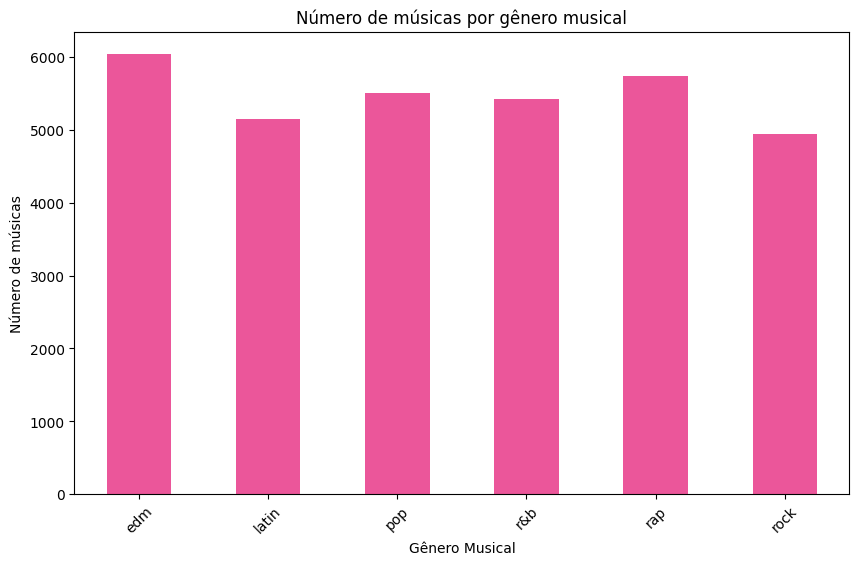

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

musicas_por_genero = dataset.groupby('playlist_genre').count()['track_name']

# Plotar o número de músicas por gênero musical
plt.figure(figsize=(10, 6))
musicas_por_genero.plot(kind='bar', color='#eb569a')
plt.title('Número de músicas por gênero musical')
plt.xlabel('Gênero Musical')
plt.ylabel('Número de músicas')
plt.xticks(rotation=45)
plt.show()

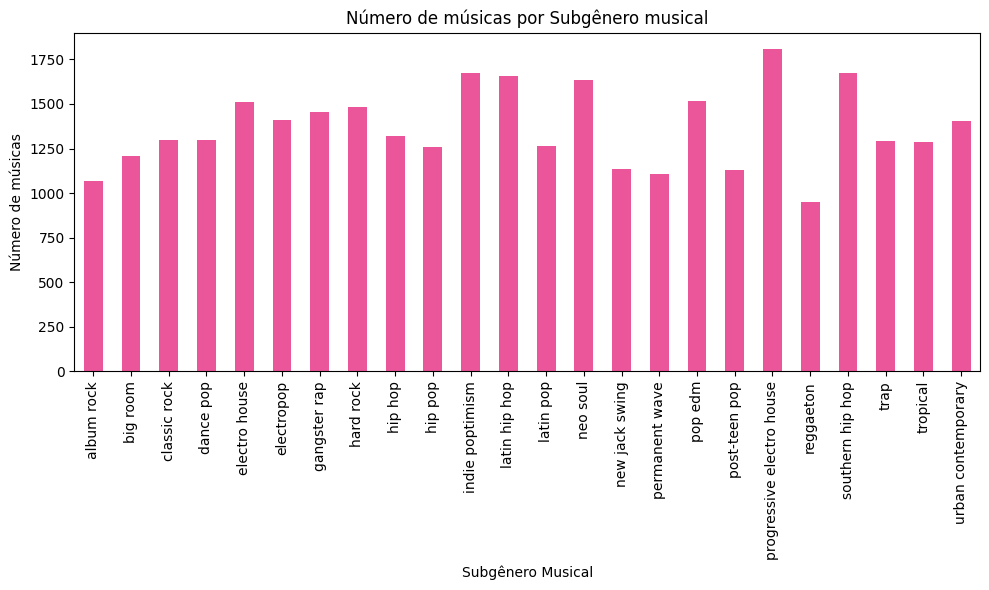

In [9]:
musicas_por_subgenero = dataset.groupby('playlist_subgenre').count()['track_name']

plt.figure(figsize=(10, 6))
musicas_por_subgenero.plot(kind='bar', color='#eb569a')
plt.title('Número de músicas por Subgênero musical')
plt.xlabel('Subgênero Musical')
plt.ylabel('Número de músicas')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         32828 non-null  object 
 1   artistas           32828 non-null  object 
 2   track_popularity   32833 non-null  int64  
 3   track_album_name   32828 non-null  object 
 4   playlist_genre     32833 non-null  object 
 5   playlist_subgenre  32833 non-null  object 
 6   danceability       32833 non-null  float64
 7   energy             32833 non-null  float64
 8   key                32833 non-null  int64  
 9   loudness           32833 non-null  float64
 10  mode               32833 non-null  int64  
 11  speechiness        32833 non-null  float64
 12  acousticness       32833 non-null  float64
 13  instrumentalness   32833 non-null  float64
 14  liveness           32833 non-null  float64
 15  valence            32833 non-null  float64
 16  tempo              328

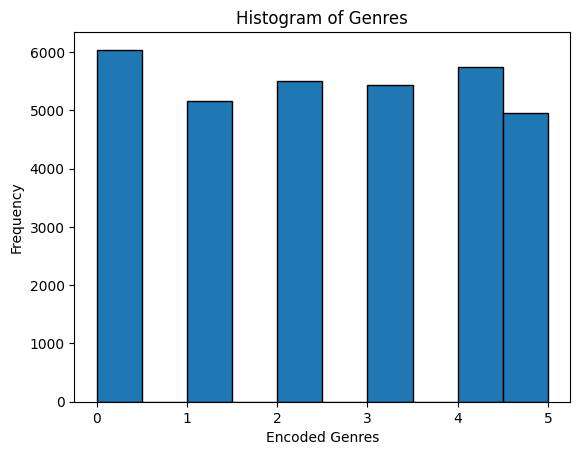

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

genre = dataset['playlist_genre']

label_encoder = LabelEncoder()

encoded_genre = label_encoder.fit_transform(genre)


plt.hist(encoded_genre, bins=10, edgecolor='black')
plt.xlabel('Encoded Genres')
plt.ylabel('Frequency')
plt.title('Histogram of Genres')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


X = dataset[['playlist_genre', 'playlist_subgenre']]
y = dataset['track_name']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.toarray())


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


model = MLPRegressor(hidden_layer_sizes=(10, 100), verbose=True, activation='relu', random_state=42)


model.fit(X_train, y_train)

genre = input('Genre: ')
subgenre = input('Subgenre: ')
new_playlist_genre = [genre, subgenre]
new_playlist_genre_encoded = encoder.transform([[new_playlist_genre[0], new_playlist_genre[1]]])


new_playlist_genre_scaled = scaler.transform(new_playlist_genre_encoded.toarray())

recommendations_encoded = model.predict(new_playlist_genre_scaled)
decoded_recommendations = label_encoder.inverse_transform(recommendations_encoded.astype(int))


print('Recommendations:')
for recommendation in decoded_recommendations:
    print(recommendation)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Iteration 1, loss = 91146559.59287308
Iteration 2, loss = 90240655.25528462
Iteration 3, loss = 86686536.62857842
Iteration 4, loss = 78958345.54605861
Iteration 5, loss = 67274632.67625637
Iteration 6, loss = 53801561.95467293
Iteration 7, loss = 41688663.32478728
Iteration 8, loss = 33127500.07955674
Iteration 9, loss = 28246981.64581347
Iteration 10, loss = 25824043.82001912
Iteration 11, loss = 24629313.34854971
Iteration 12, loss = 23984298.62115882
Iteration 13, loss = 23596290.41203589
Iteration 14, loss = 23337063.90801565
Iteration 15, loss = 23158144.49842665
Iteration 16, loss = 23033221.52776109
Iteration 17, loss = 22942477.30335945
Iteration 18, loss = 22878233.03414791
Iteration 19, loss = 22826611.81646799
Iteration 20, loss = 22790521.82162562
Iteration 21, loss = 22761791.43426115
Iteration 22, loss = 22743573.01419691
Iteration 23, loss = 22725900.61743692
Iteration 24, loss = 22716049.54044656
Iteration 25, loss = 22707885.94205562
Iteration 26, loss = 22702098.3592

c:\Users\WIN 10\anaconda3\envs\dataScience\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
